In [27]:
# Weighted least squares

      receivedSvTimeInGpsNanos           trace_name   rx_name     gps_millis  \
0          1293916341584490752  2021-01-05-US-SVL-1  Pixel4XL  1293916337653   
1          1293916341574442240  2021-01-05-US-SVL-1  Pixel4XL  1293916337653   
2          1293916341588006912  2021-01-05-US-SVL-1  Pixel4XL  1293916337653   
3          1293916341584543232  2021-01-05-US-SVL-1  Pixel4XL  1293916337653   
4          1293916341579758592  2021-01-05-US-SVL-1  Pixel4XL  1293916337653   
...                        ...                  ...       ...            ...   
6943       1293917766583801600  2021-01-05-US-SVL-1  Pixel4XL  1293917762445   
6944       1293917766568201984  2021-01-05-US-SVL-1  Pixel4XL  1293917762445   
6945       1293917766576103680  2021-01-05-US-SVL-1  Pixel4XL  1293917762445   
6946       1293917766571077120  2021-01-05-US-SVL-1  Pixel4XL  1293917762445   
6947       1293917766572354816  2021-01-05-US-SVL-1  Pixel4XL  1293917762445   

      gnss_id  sv_id signal_type       

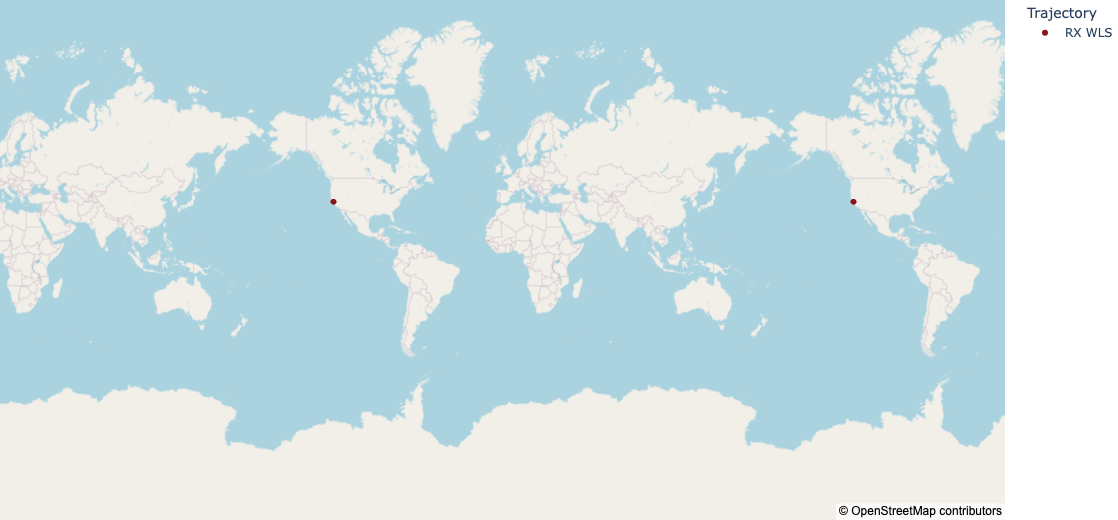

In [28]:
import gnss_lib_py as glp
# load Android Google Challenge data
glp.make_dir("data") # Create "data" directory in the current working directory
!wget https://raw.githubusercontent.com/Stanford-NavLab/gnss_lib_py/main/data/unit_test/google_decimeter_2021/Pixel4XL_derived.csv --quiet -nc -O "data/Pixel4XL_derived.csv"
derived_data = glp.AndroidDerived2021("data/Pixel4XL_derived.csv", remove_timing_outliers=False)
print(derived_data)
state_wls = glp.solve_wls(derived_data)
# When assuming that SV positions are given in the ECEF frame when signals are received use
# state_wls = glp.solve_wls(derived_data, sv_rx_time=True)
glp.plot_map(state_wls)

In [29]:
# Extended kalman filter

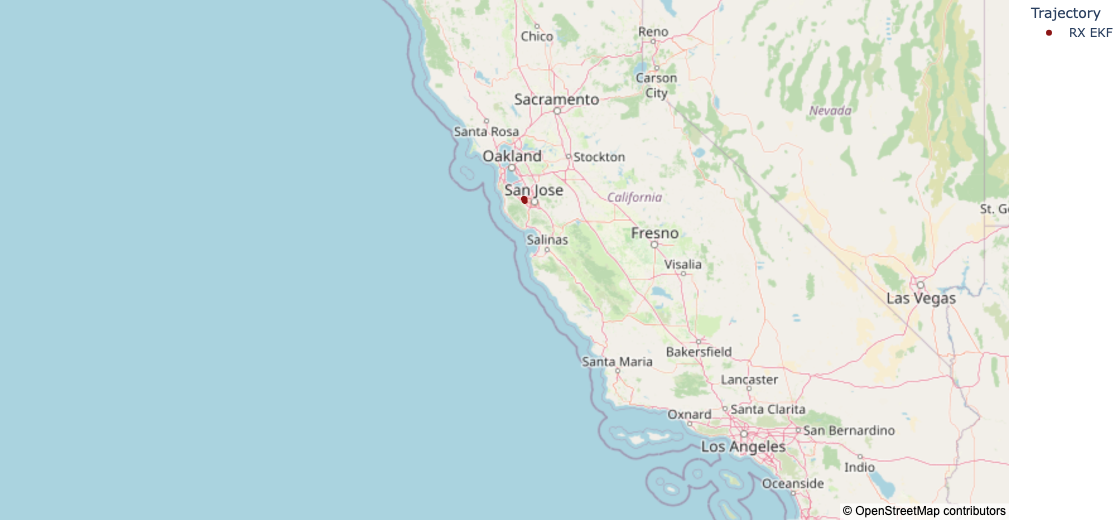

In [30]:
import gnss_lib_py as glp
# load Android Google Challenge data
glp.make_dir("../data")
!wget https://raw.githubusercontent.com/Stanford-NavLab/gnss_lib_py/main/data/unit_test/google_decimeter_2021/Pixel4XL_derived.csv --quiet -nc -O "../data/Pixel4XL_derived.csv"
derived_data = glp.AndroidDerived2021("../data/Pixel4XL_derived.csv", remove_timing_outliers=False)
state_ekf = glp.solve_gnss_ekf(derived_data)
glp.plot_map(state_ekf)

AttributeError: 'Figure' object has no attribute 'set_layout_engine'

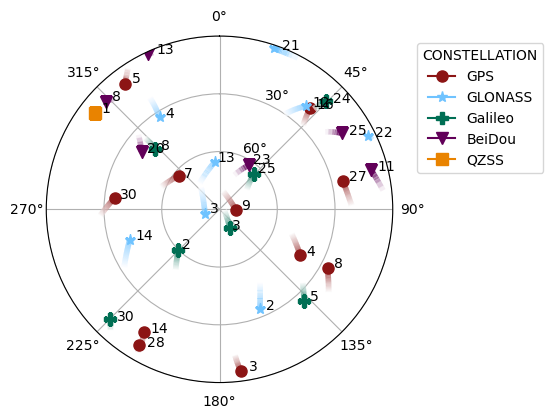

In [31]:
state_estimate = glp.solve_wls(derived_data)
fig=glp.plot_skyplot(derived_data, state_estimate)


         collectionName phoneName  millisSinceGpsEpoch  constellationType  \
0   2021-01-05-US-SVL-1  Pixel4XL         1.293920e+12                  1   
1   2021-01-05-US-SVL-1  Pixel4XL         1.293920e+12                  1   
2   2021-01-05-US-SVL-1  Pixel4XL         1.293920e+12                  1   
3   2021-01-05-US-SVL-1  Pixel4XL         1.293920e+12                  1   
4   2021-01-05-US-SVL-1  Pixel4XL         1.293920e+12                  1   
5   2021-01-05-US-SVL-1  Pixel4XL         1.293920e+12                  6   
6   2021-01-05-US-SVL-1  Pixel4XL         1.293920e+12                  3   
7   2021-01-05-US-SVL-1  Pixel4XL         1.293920e+12                  3   
8   2021-01-05-US-SVL-1  Pixel4XL         1.293920e+12                  3   
9   2021-01-05-US-SVL-1  Pixel4XL         1.293920e+12                  6   
10  2021-01-05-US-SVL-1  Pixel4XL         1.293920e+12                  3   
11  2021-01-05-US-SVL-1  Pixel4XL         1.293920e+12                  6   

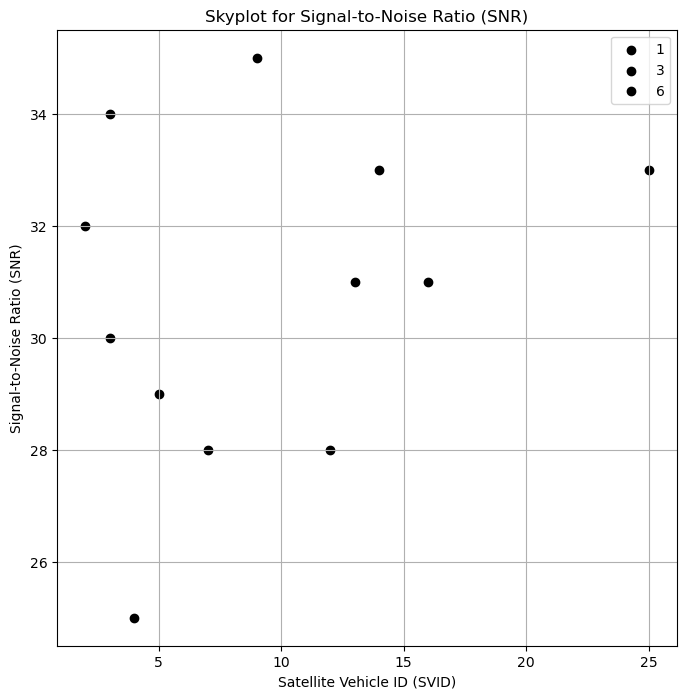

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('sample_data.csv')
print(df)
# Define colors for different constellations
constellation_colors = {
    'GPS': 'blue',
    'GLONASS': 'green',
    'BEIDOU': 'red',
    'GALILEO': 'orange'
}

# Plotting
plt.figure(figsize=(8, 8))

for constellation, group in df.groupby('constellationType'):
    plt.scatter(group['svid'], group['SNR'], label=constellation, color=constellation_colors.get(constellation, 'black'))

plt.xlabel('Satellite Vehicle ID (SVID)')
plt.ylabel('Signal-to-Noise Ratio (SNR)')
plt.title('Skyplot for Signal-to-Noise Ratio (SNR)')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Read the CSV file
# data = pd.read_csv('sample_data1.csv')

# # Define colors for different constellations (if applicable)
# constellation_colors = {
#     'GPS': 'blue',
#     'GLONASS': 'green',
#     'BEIDOU': 'red',
#     'GALILEO': 'orange'
# }

# # Convert azimuth to radians for polar plot
# data['azimuth_rad'] = np.radians(data['azimuth'])

# # Plotting
# plt.figure(figsize=(8, 8))
# ax = plt.subplot(111, polar=True)

# # Scatter plot for each satellite
# ax.scatter(data['azimuth_rad'], data['elevation'], c=data['SNR'], cmap='viridis', alpha=0.75)

# ax.set_theta_zero_location('N')
# ax.set_theta_direction(-1)
# ax.set_rlabel_position(90)
# ax.set_title('Skyplot for GNSS Data (SNR)')
# ax.grid(True)

# # Add colorbar
# cbar = plt.colorbar(ax.scatter([], [], c=[], cmap='viridis', alpha=0.75), ax=ax, orientation='vertical')
# cbar.set_label('SNR')

# plt.show()


    azimuth  elevation  SNR
0       330        125   32
1        30         15   25
2        60         30   30
3       120         45   35
4       150         60   28
5       200         75   31
6       240         90   33
7       280        105   28
8       320        120   31
9        40         20   27
10       90         35   32
11      110         50   34
12      160         65   29
13      210         80   32
14      250         95   34
15      300        110   29


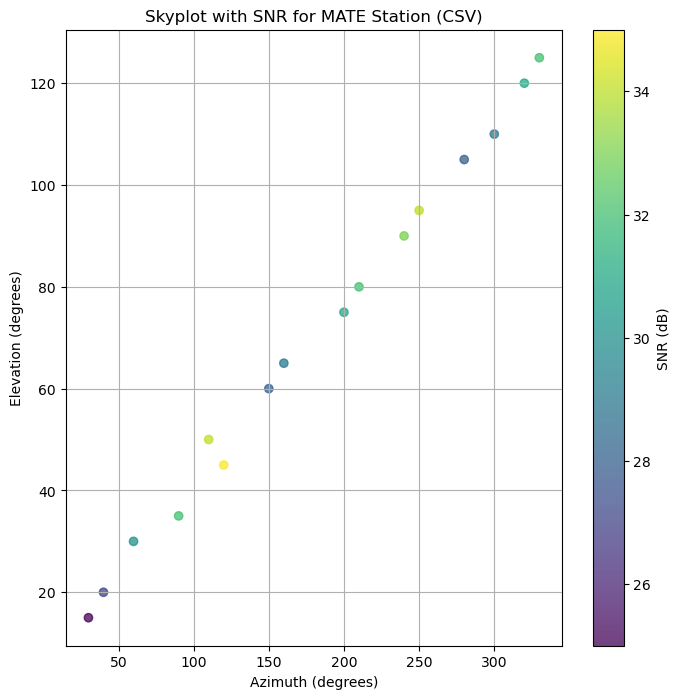

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
data1= pd.read_csv("sample_data11.csv")
print(data1)
# Filter by station (if necessary)

# Extract necessary columns
azimuth = data1["azimuth"]
elevation = data1["elevation"]
snr = data1["SNR"]

# Create the skyplot
plt.figure(figsize=(8, 8))
plt.scatter(azimuth, elevation, c=snr, cmap="viridis", alpha=0.75)
plt.colorbar(label="SNR (dB)")
plt.xlabel("Azimuth (degrees)")
plt.ylabel("Elevation (degrees)")
plt.title("Skyplot with SNR for MATE Station (CSV)")
plt.grid(True)
plt.show()


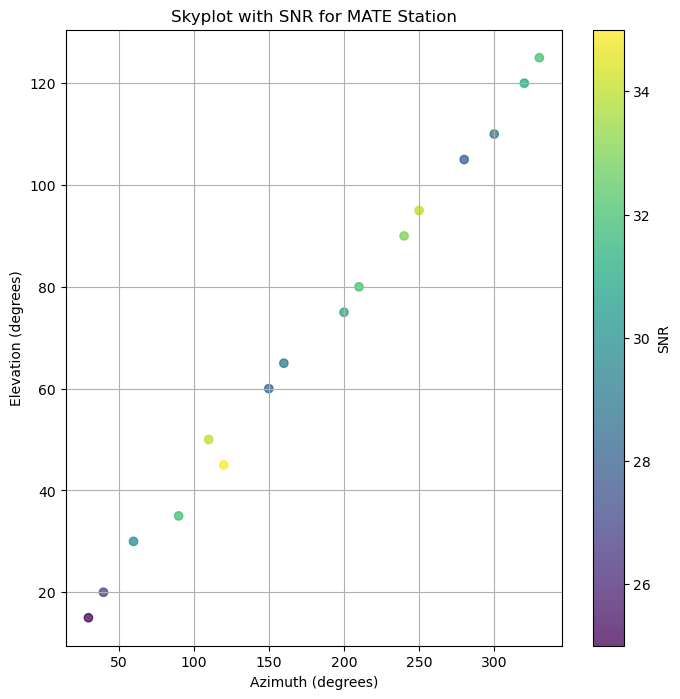

In [23]:
import gnss_lib_py as glp  # Assuming you have the gnss_py_lib file in your working directory or installed as a package
import matplotlib.pyplot as plt

# Step 1: Read the data for the MATE station
# Assuming the data is stored in a variable named 'mate_data'
mate_data= pd.read_csv("sample_data11.csv")

# Step 2: Extract SNR data
# Assuming SNR data is stored in a variable named 'snr_data'
snr_data = mate_data['SNR']
state_ekf = glp.solve_gnss_ekf(snr_data)
glp.plot_map(state_ekf)
# Step 3: Plot the skyplot with SNR values
plt.figure(figsize=(8, 8))
plt.scatter(mate_data['azimuth'], mate_data['elevation'], c=snr_data, cmap='viridis', alpha=0.75)
plt.colorbar(label='SNR')
plt.xlabel('Azimuth (degrees)')
plt.ylabel('Elevation (degrees)')
plt.title('Skyplot with SNR for MATE Station')
plt.grid(True)
plt.show()